In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv(r'E:\ML\DNN\covid_19_data.csv')

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [4]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [7]:
df3 = df2.groupby(['Date','Country'])[['Date','Country','Confirmed','Deaths','Recovered']].sum().reset_index()

In [8]:
df3 = df3.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [11]:
df3.head(20)

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1,0,0
1,"('St. Martin',)",2020-03-10,2,0,0
2,Afghanistan,2020-02-24,1,0,0
3,Afghanistan,2020-02-25,1,0,0
4,Afghanistan,2020-02-26,1,0,0
5,Afghanistan,2020-02-27,1,0,0
6,Afghanistan,2020-02-28,1,0,0
7,Afghanistan,2020-02-29,1,0,0
8,Afghanistan,2020-03-01,1,0,0
9,Afghanistan,2020-03-02,1,0,0


In [12]:
countries = df3['Country'].unique()
len(countries)

171

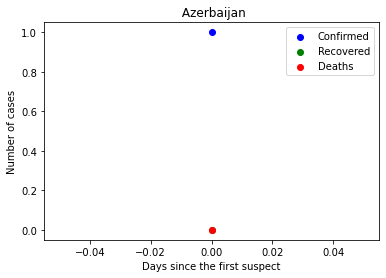

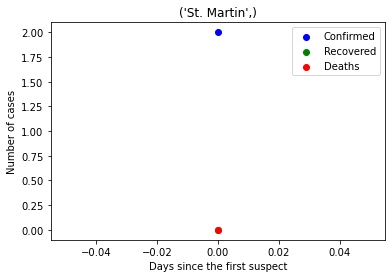

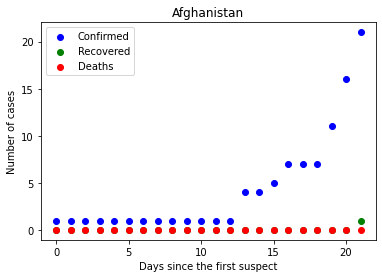

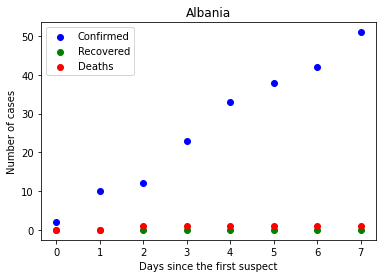

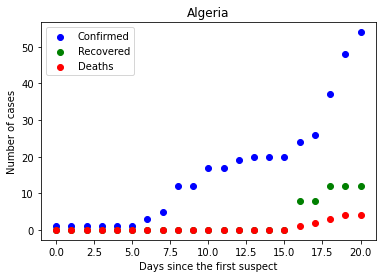

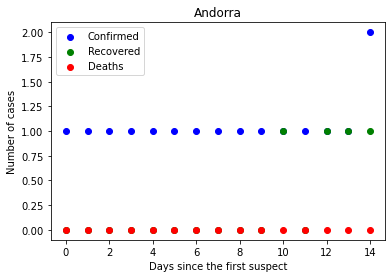

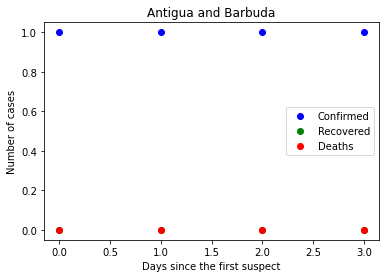

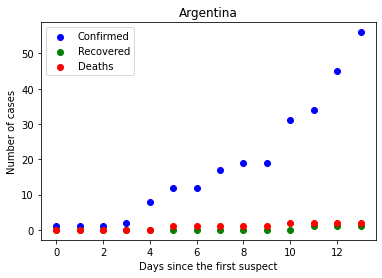

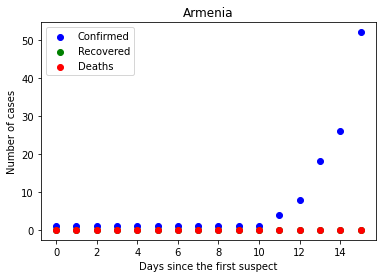

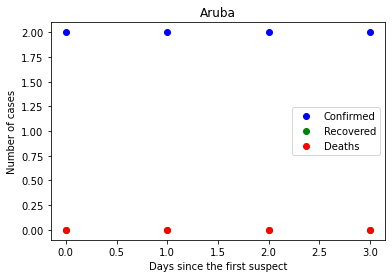

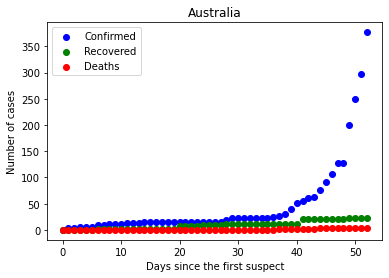

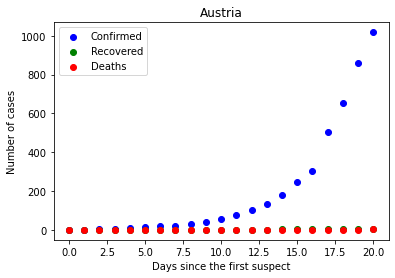

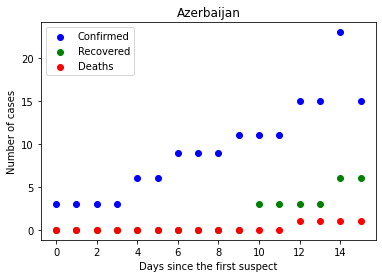

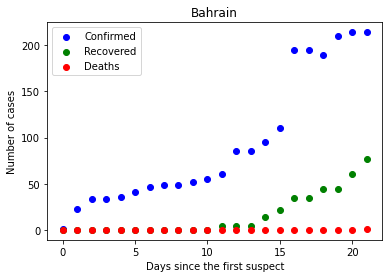

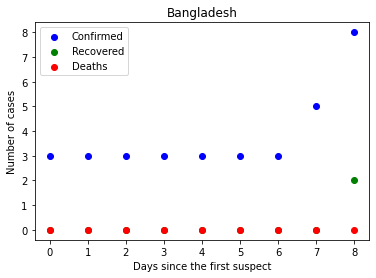

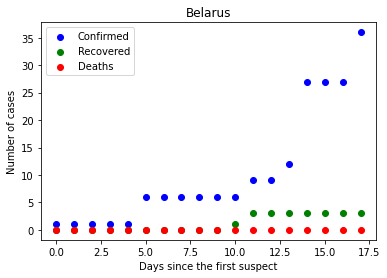

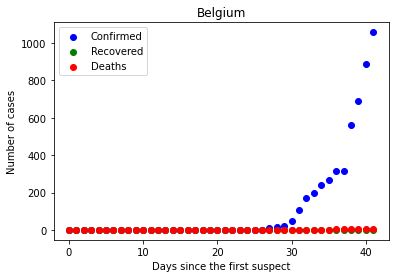

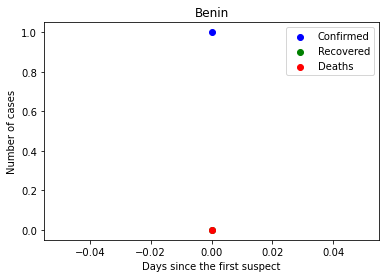

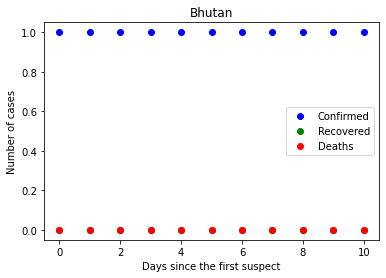

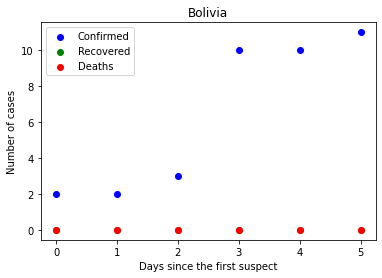

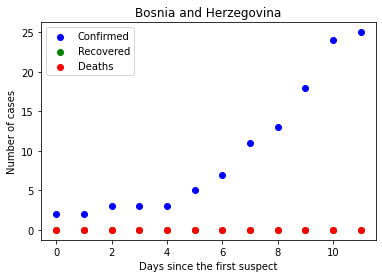

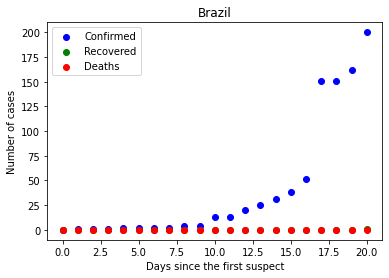

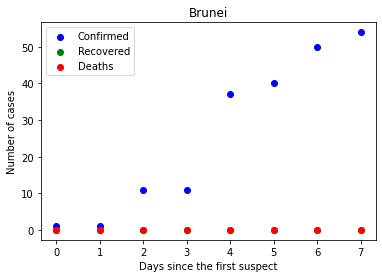

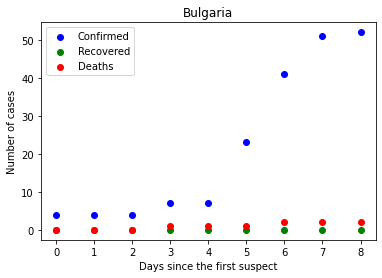

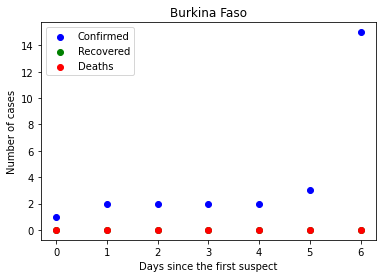

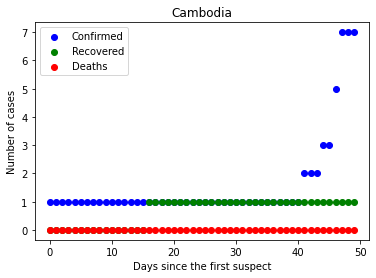

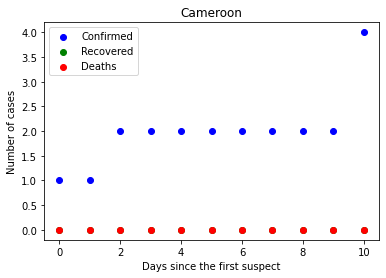

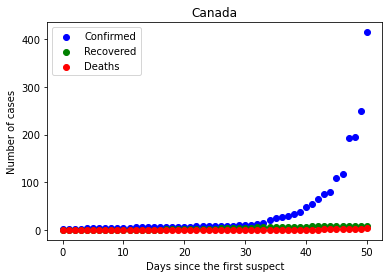

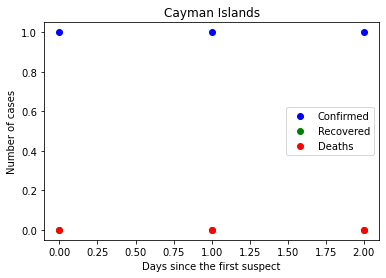

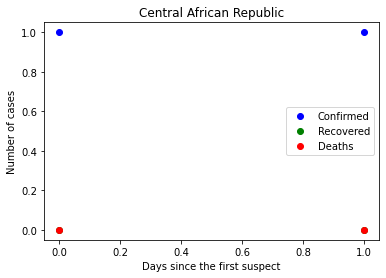

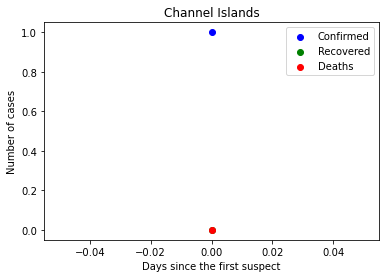

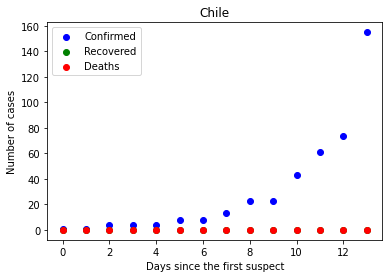

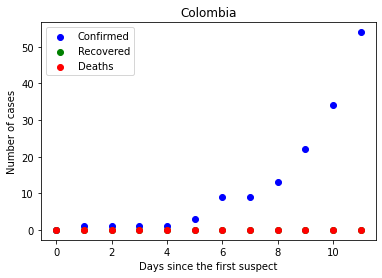

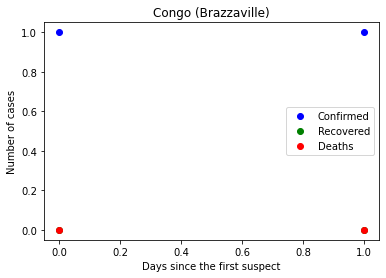

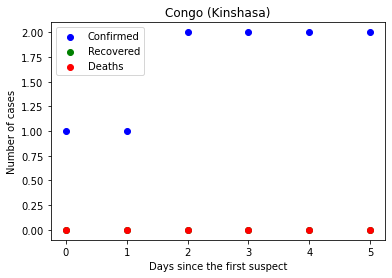

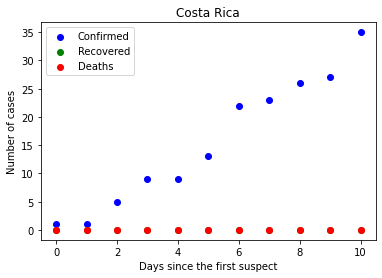

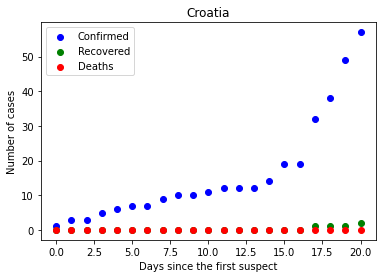

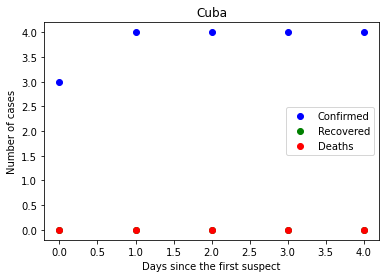

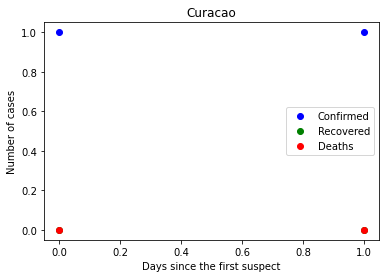

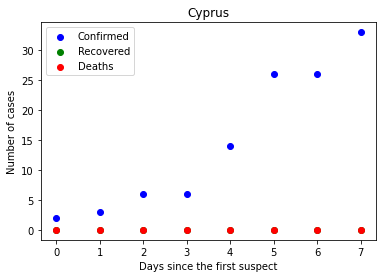

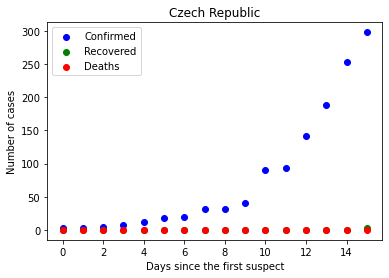

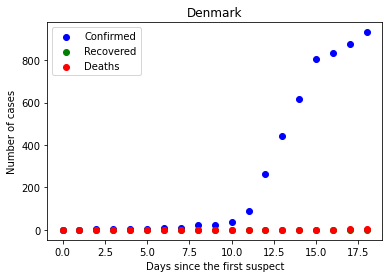

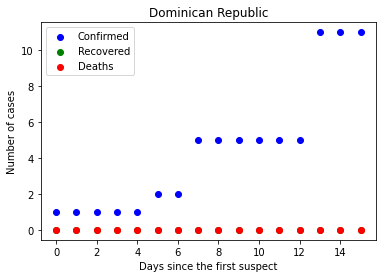

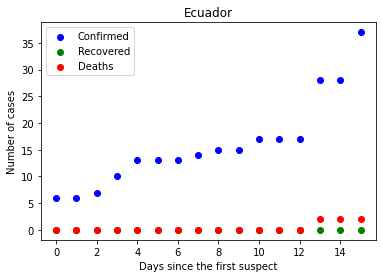

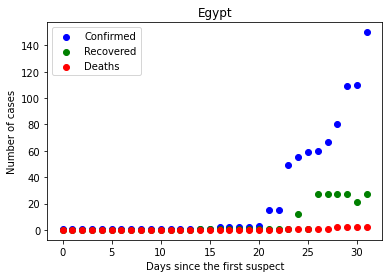

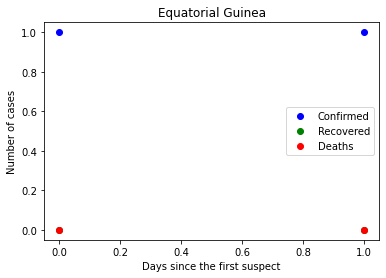

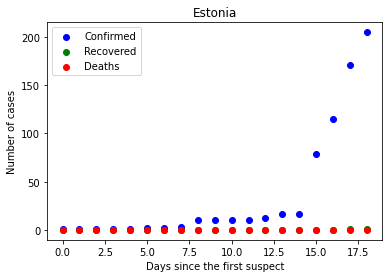

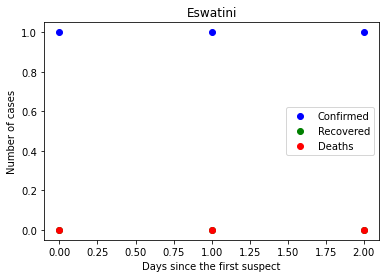

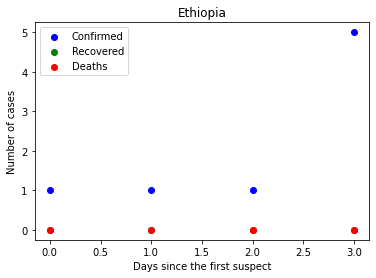

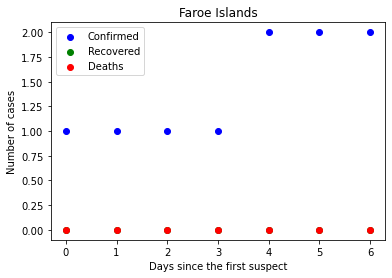

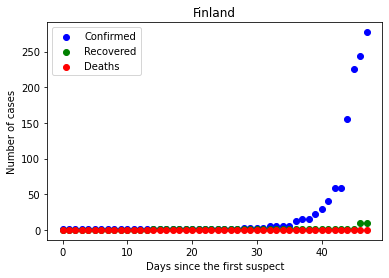

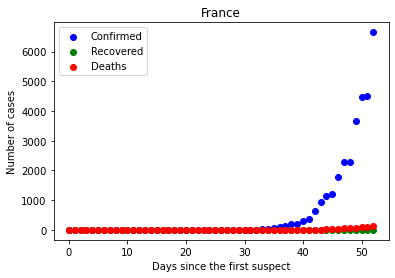

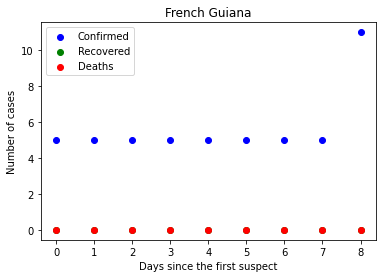

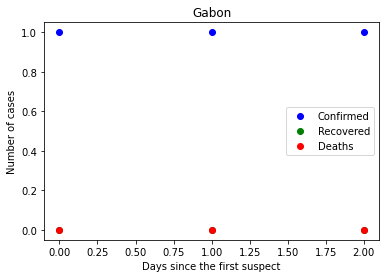

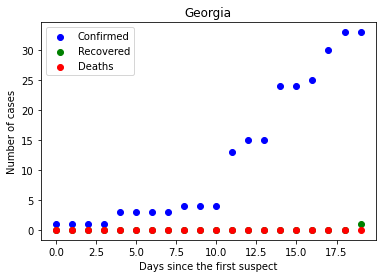

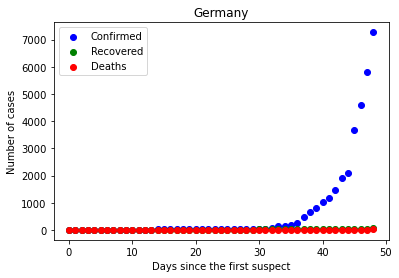

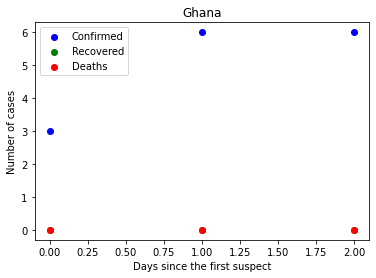

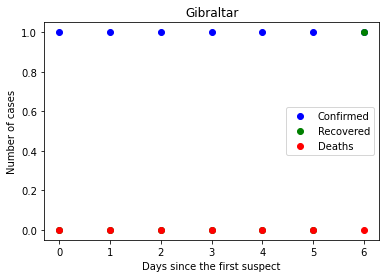

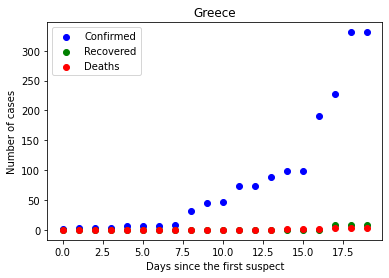

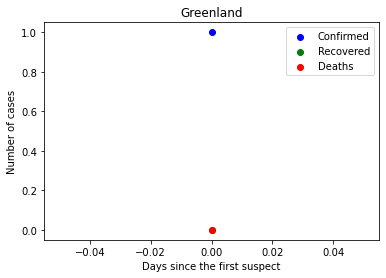

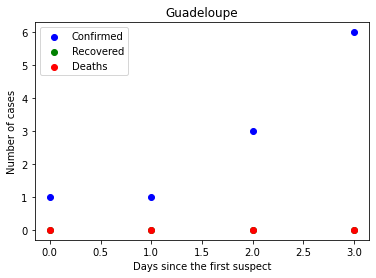

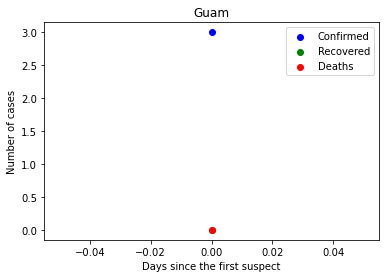

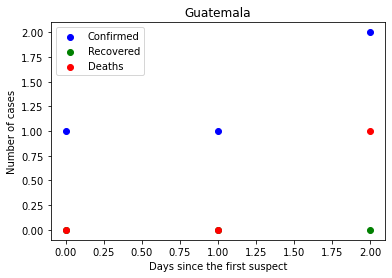

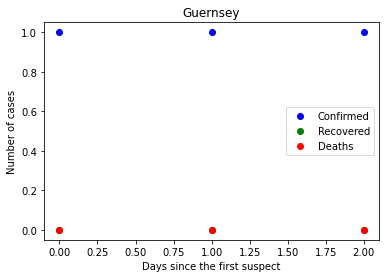

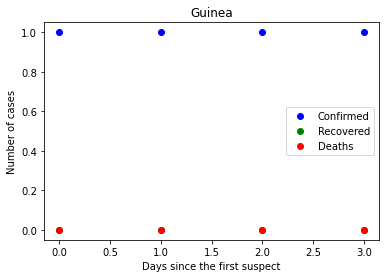

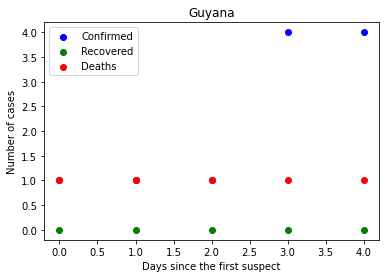

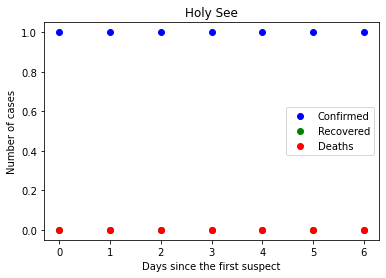

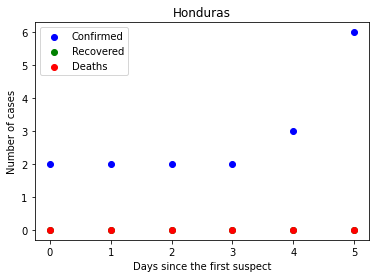

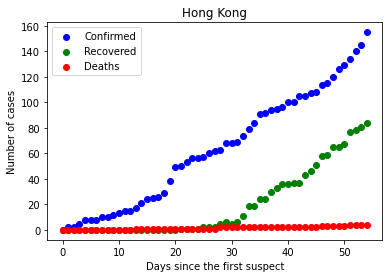

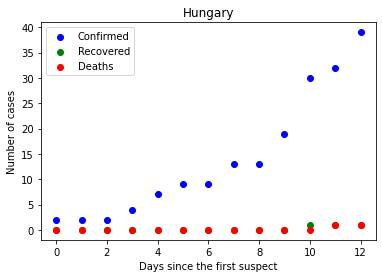

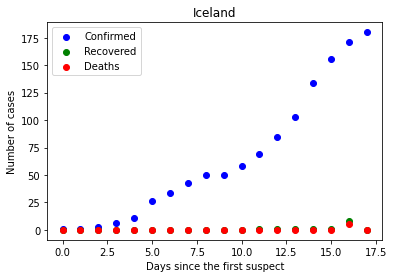

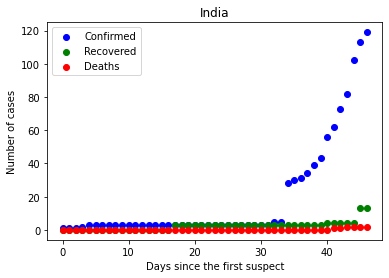

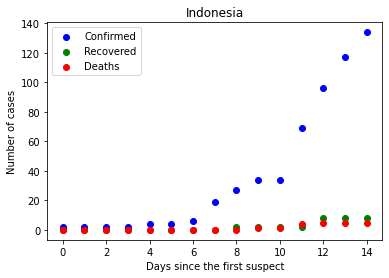

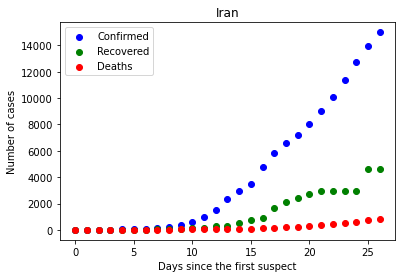

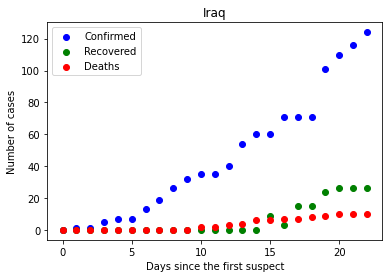

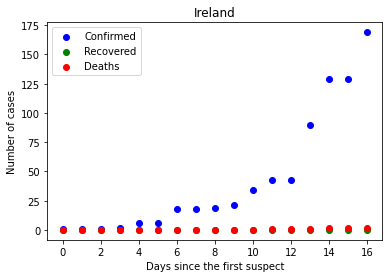

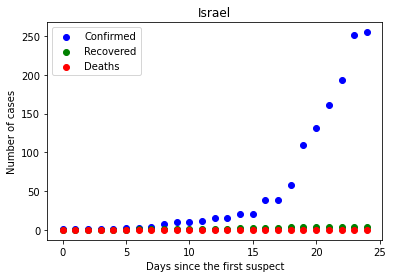

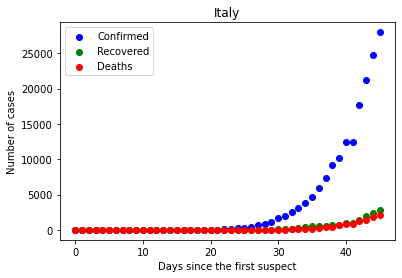

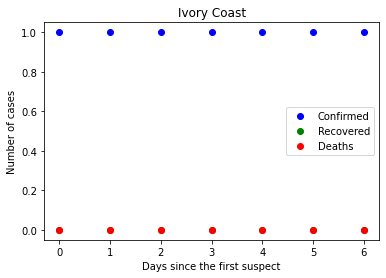

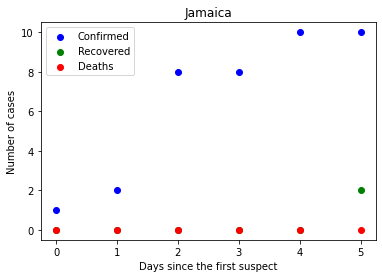

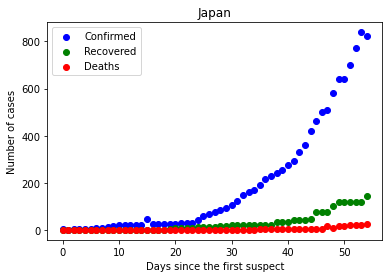

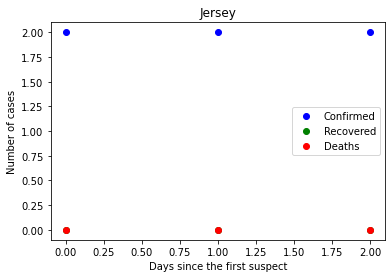

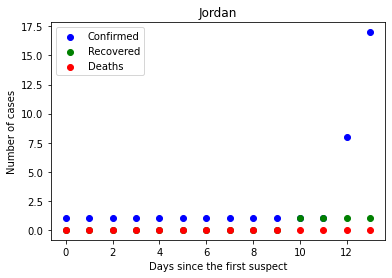

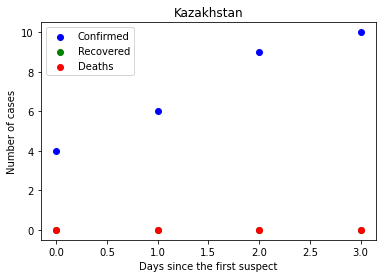

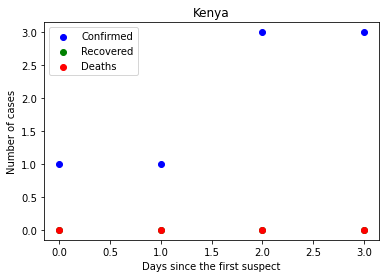

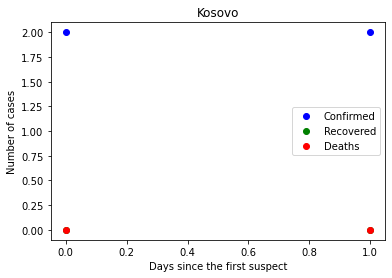

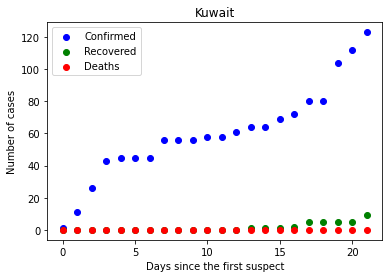

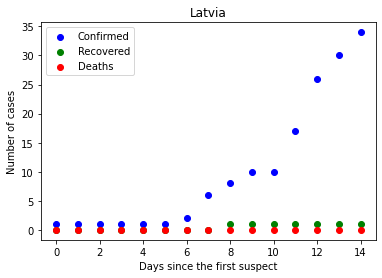

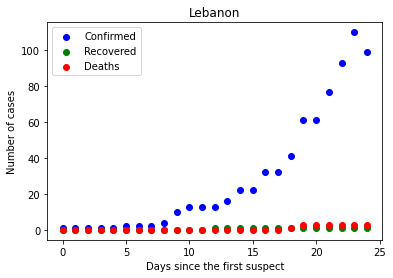

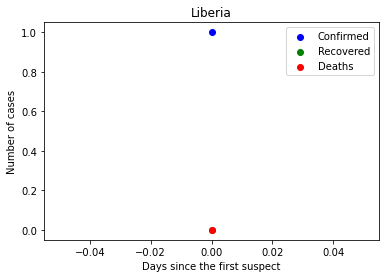

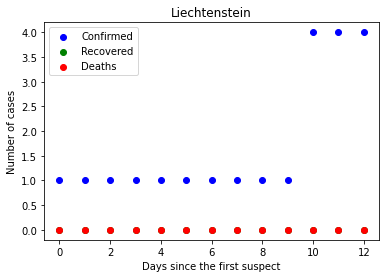

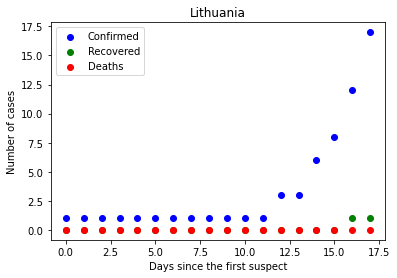

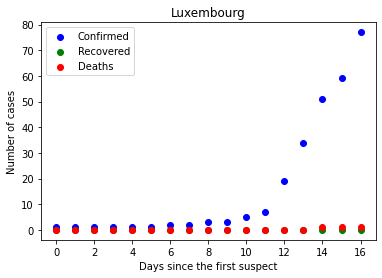

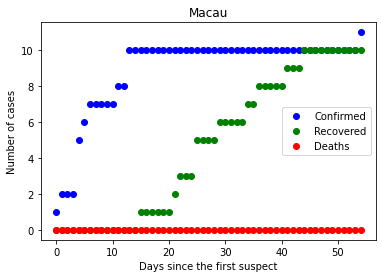

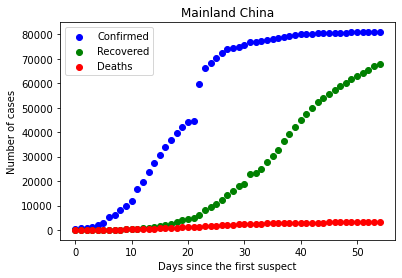

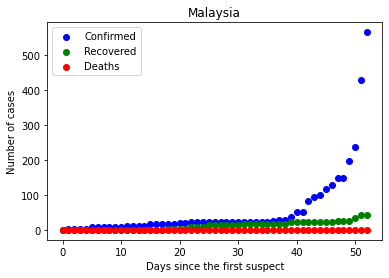

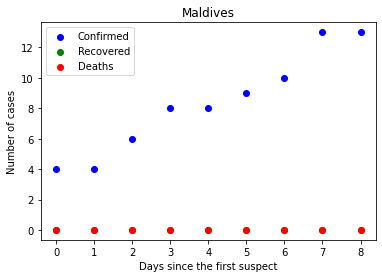

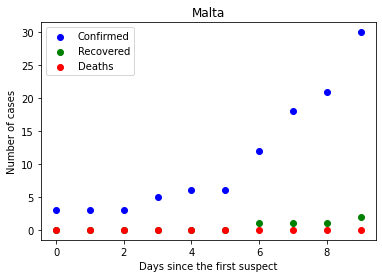

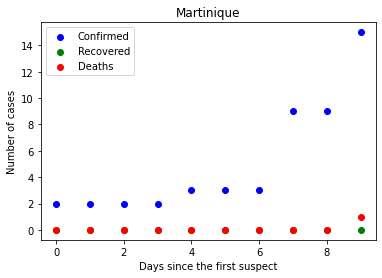

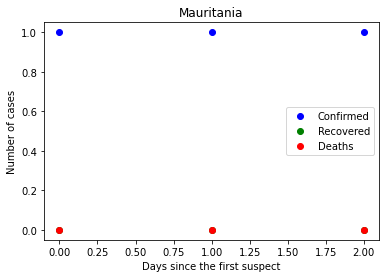

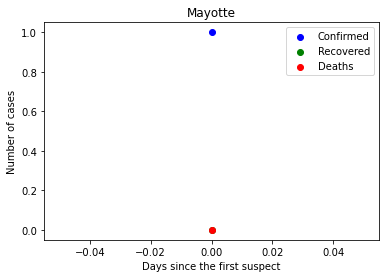

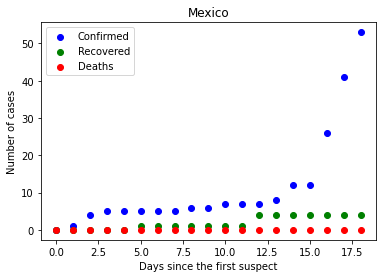

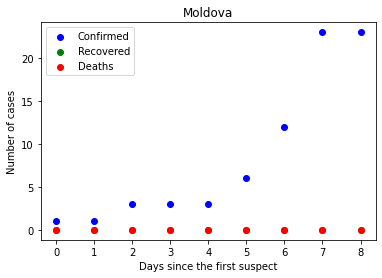

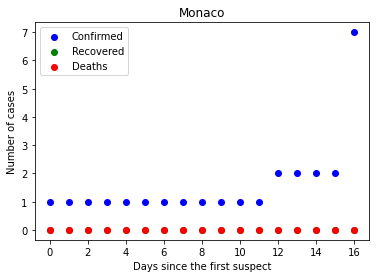

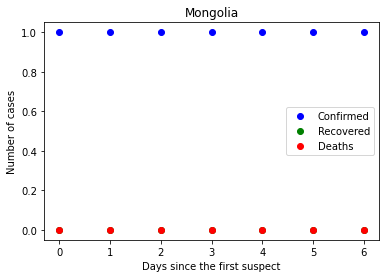

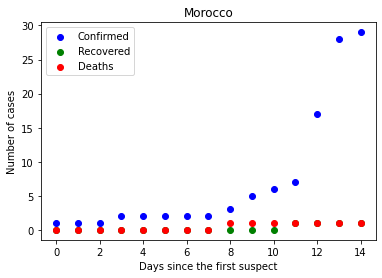

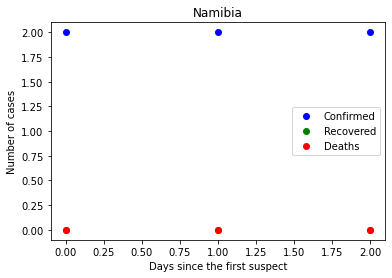

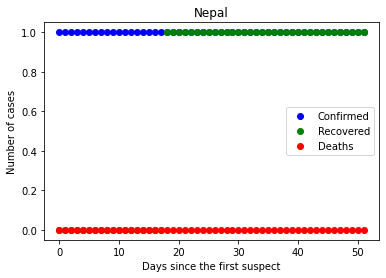

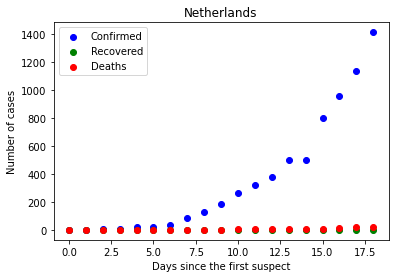

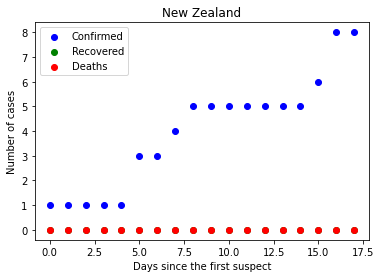

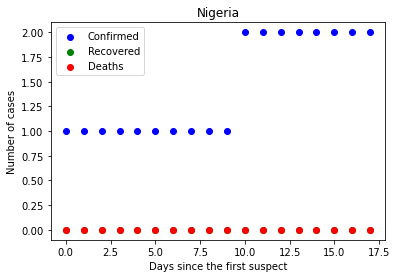

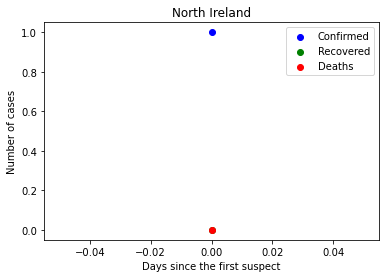

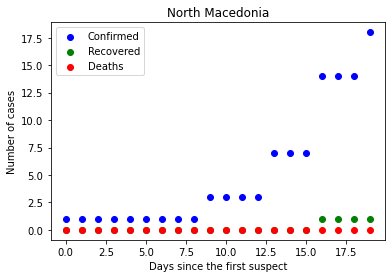

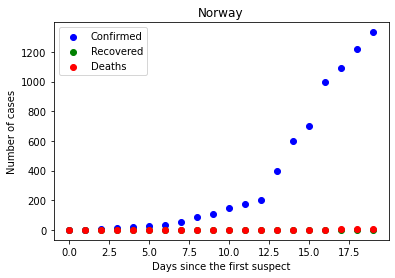

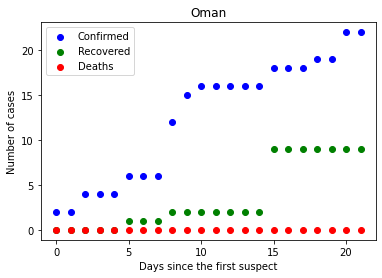

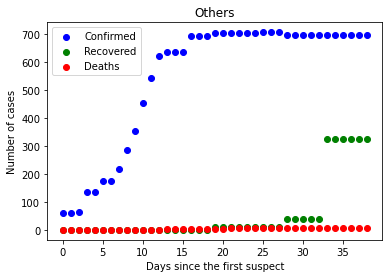

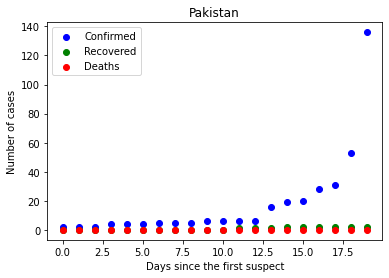

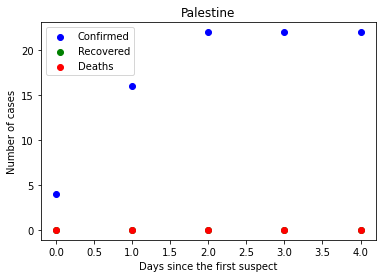

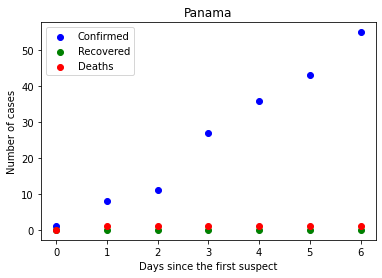

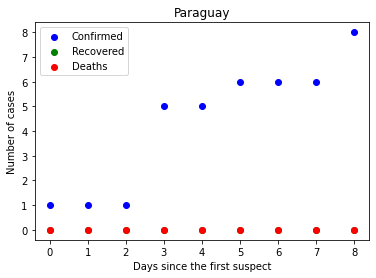

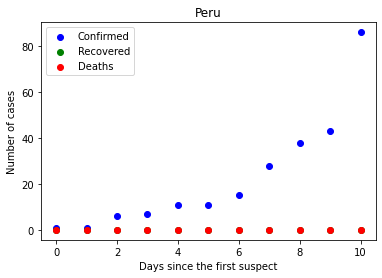

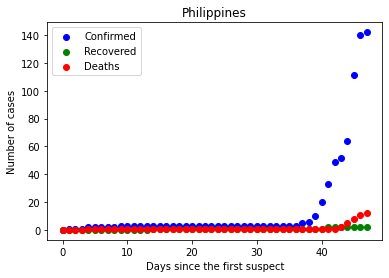

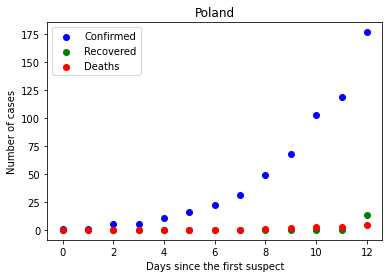

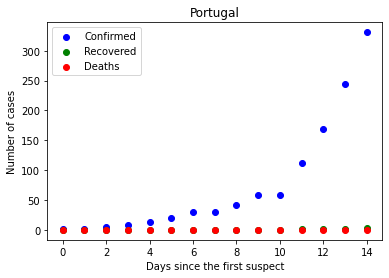

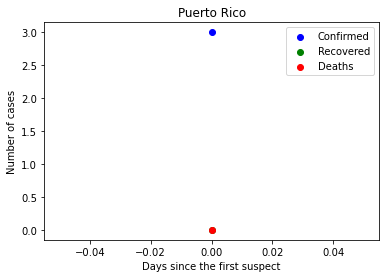

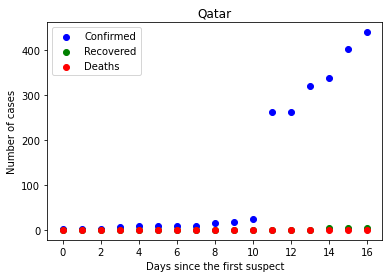

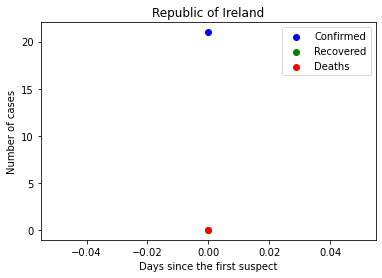

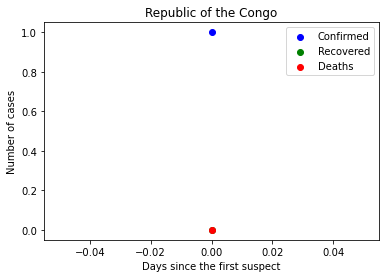

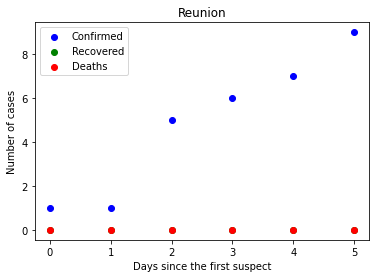

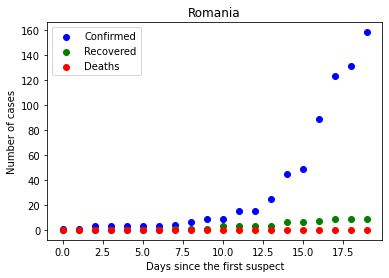

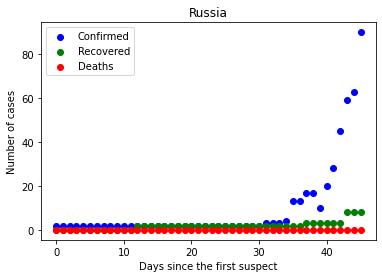

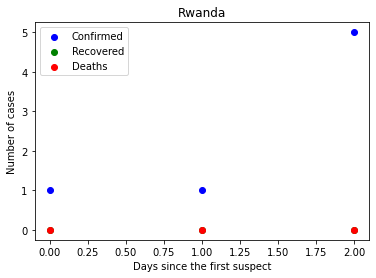

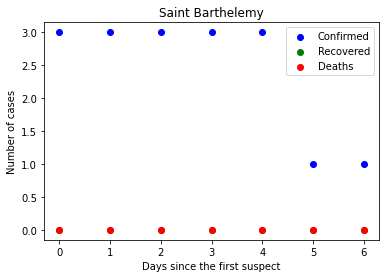

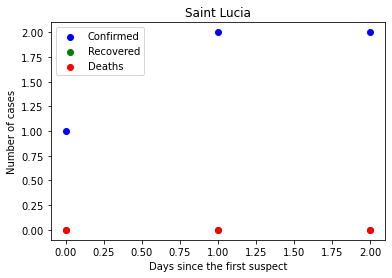

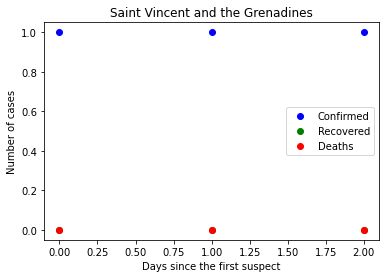

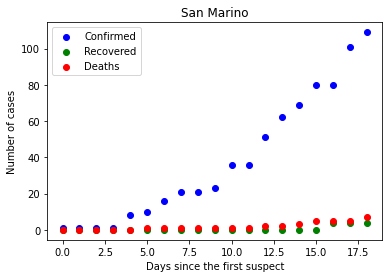

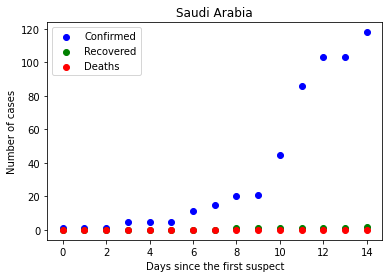

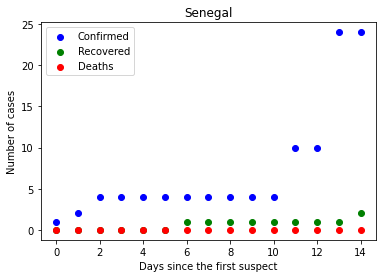

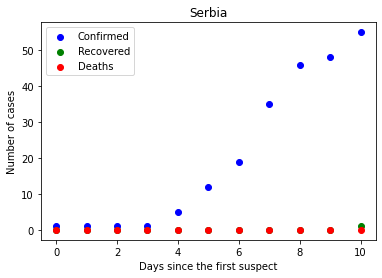

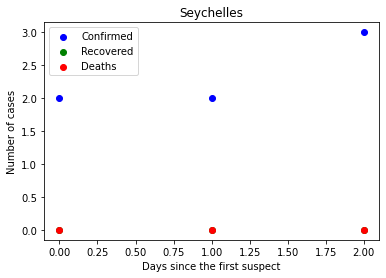

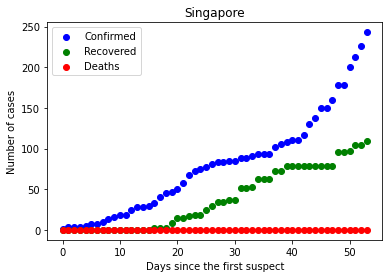

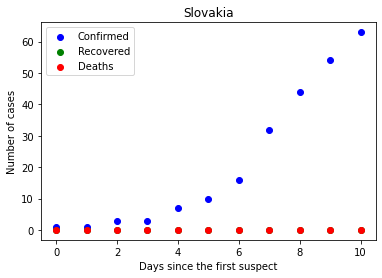

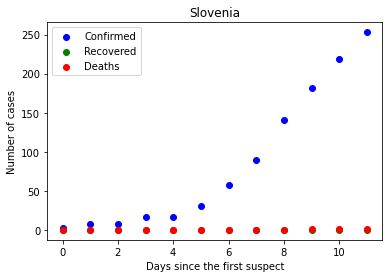

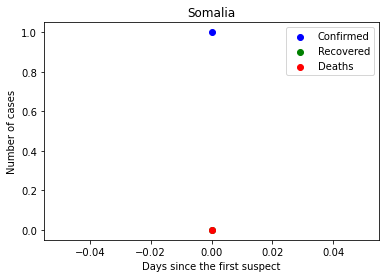

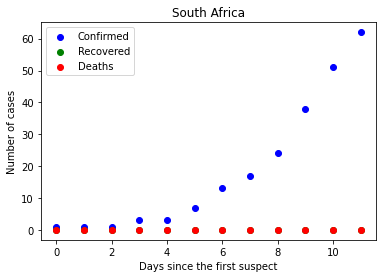

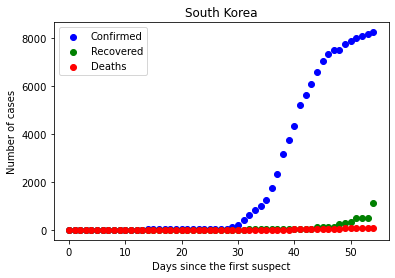

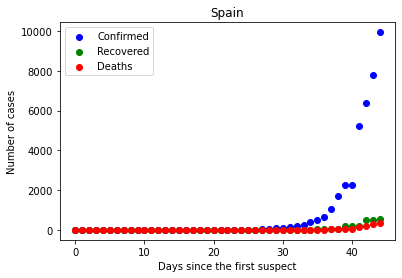

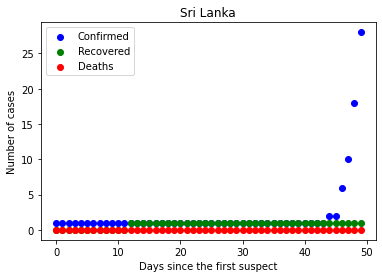

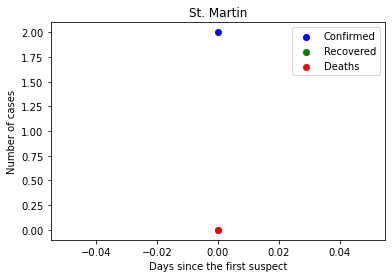

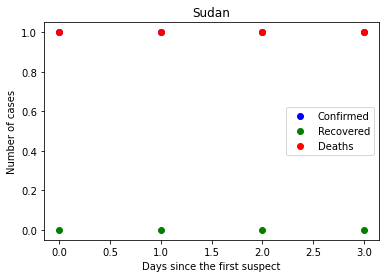

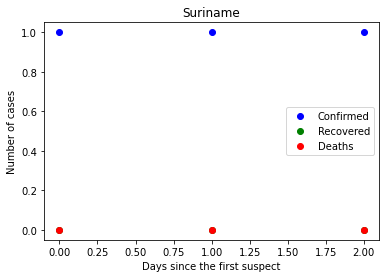

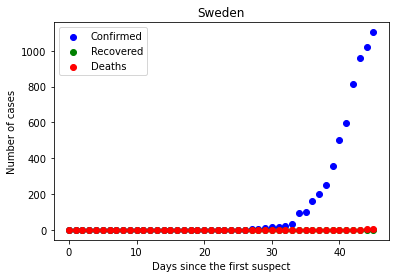

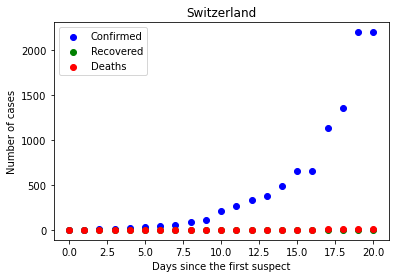

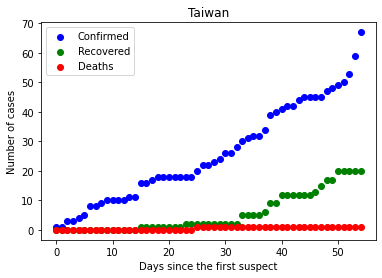

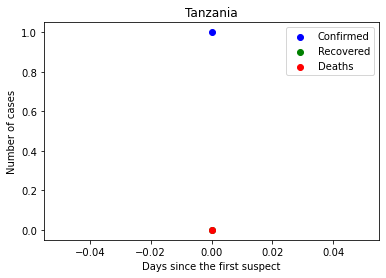

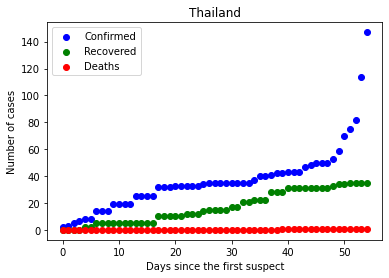

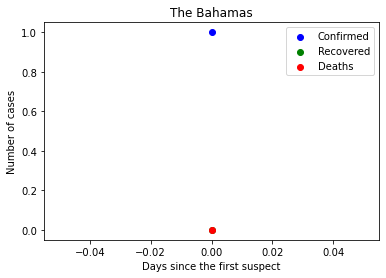

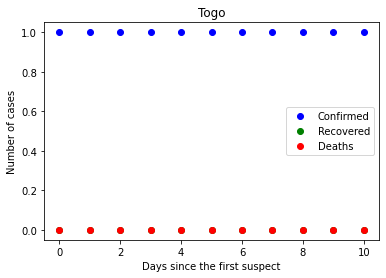

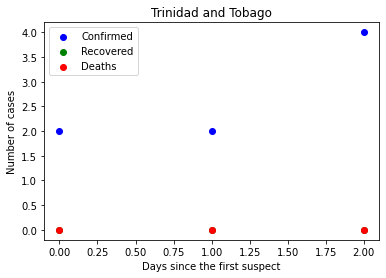

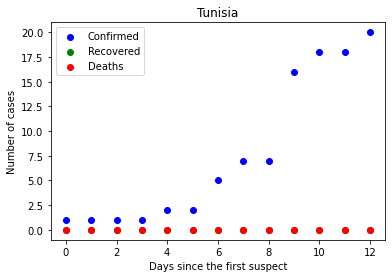

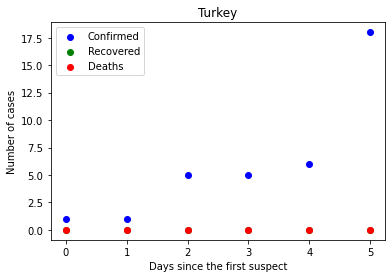

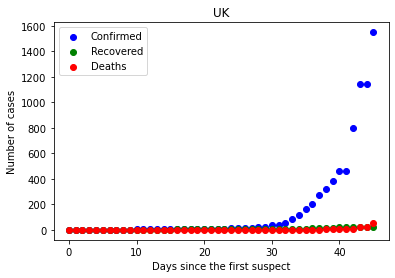

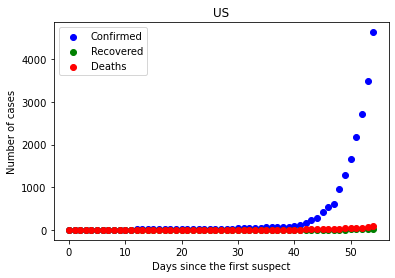

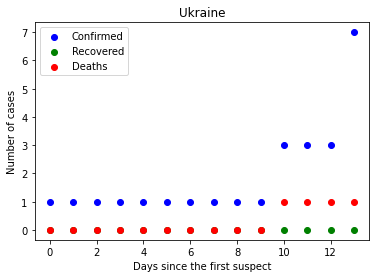

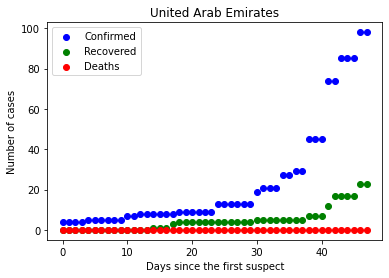

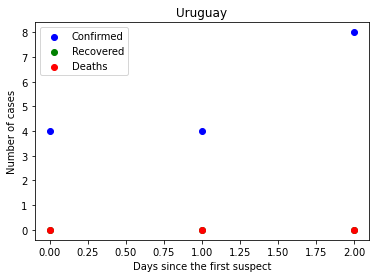

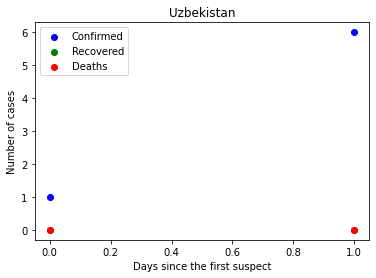

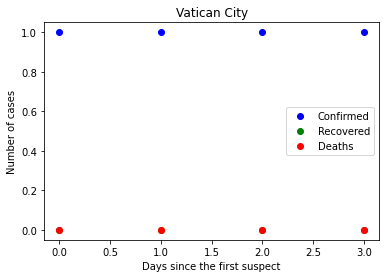

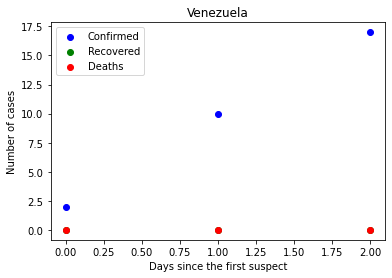

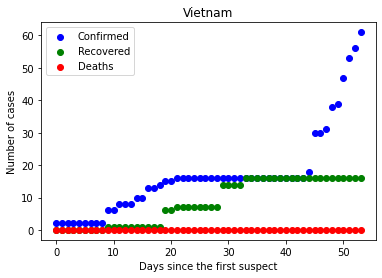

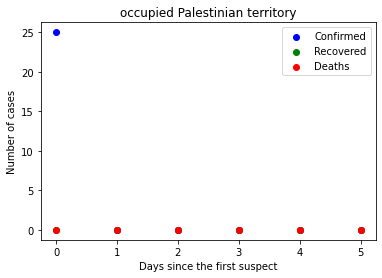

In [13]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()    

In [14]:
df4 = df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

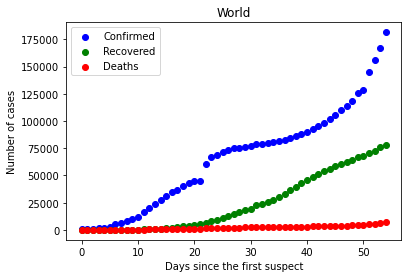

In [15]:
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()